In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r"C:\Users\dipak.D\Documents\MSC\MSC_SEM_4\Project\DATA3.xlsx")

In [3]:
data.head()

,Name,Q1,Q2,Q3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,...,Q14_10,Q15_10,Q16_10,S1,S2,S3,S4,S5,S6,S7
0,Shonuben nileshbhai bariya,45,4,Job Housewife Independent Profession,0,1,0,0,1,0,...,2,NaN,3,43.333333,50.000000,48.888889,24.444444,36.666667,54.444444,24.444444
1,Tinaben bariya,65,1,Job,0,0,0,0,1,0,...,4,NaN,3,47.777778,53.333333,54.444444,35.555556,30.000000,65.555556,28.888889
2,Sonal bariya,35,5,Housewife small businessJob,0,0,0,0,1,1,...,4,NaN,3,65.555556,60.000000,65.555556,47.777778,47.777778,76.666667,34.444444
3,Gita,83,0,small businessJob,0,0,0,0,1,1,...,2,NaN,3,61.111111,72.222222,77.777778,42.222222,35.555556,72.222222,23.333333
4,Hemu,35,5,Housewife Job,0,0,0,0,1,0,...,2,NaN,3,60.000000,53.333333,65.555556,41.111111,34.444444,71.111111,34.444444


## SOCIO_ECONOMIC ANALYSIS

### PROPORTION TEST

- **H0 : In the population the proportion of farming  and non-farming are same.**
- **H1: In the population the proportion of farming  and non-farming are not same.**

In [35]:
import statsmodels.stats.proportion as st
count=[85,40]
nobs=[125,125]
st.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

(5.692099788303084, 1.2548647497615055e-08)

>#### p value < alpha, we reject Ho, and conclude that proportion of farming and non-farming are not same for population.

- **H0 : In the population the proportion no of SHG and Non-SHG group are same.**
- **H1: In the population the proportion no of SHG and Non-SHG group are same.**

In [32]:
count=[81,44]
nobs=[125,125]
st.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)

(4.680170937049202, 2.8663582940719003e-06)

>#### p value < alpha, we reject Ho, and conclude that proportion of SHG and non-SHG are not same for population.

- **H0: The proportion of middle class family is 69.60**
- **H0: The proportion of middle class family is not 69.60**

In [51]:
count=87
nobs=125
st.proportions_ztest(count, nobs, value=0.69, alternative='two-sided', prop_var=False)

(0.14583603402563686, 0.8840508289568945)

> **CONCLUSION:** p value > alpha, we do not reject Ho, and conclude that middle class family has proportion of 69.6%

- **Ho: The proportion of Lower middle class family is 25.60%**
- **H1: The proportion of Lower middle class family is not 25.60%**

In [50]:
count=32
nobs=125
st.proportions_ztest(count, nobs, value=0.256, alternative='two-sided', prop_var=False)

(0.0, 1.0)

> **CONCLUSION:** p value > alpha, we do not reject Ho, and conclude that Lower middle class family has proportion 25.60%

### EQUALITY OF VARIANCE

#### H0 : Variance of SES for farming and non-farming are equal.  Against
#### H1 : Variances of SES for farming and non-farming are not equal.

In [27]:
import scipy.stats as sci
mean1=0
mean2=0
data1=[]
data2=[]
df1=125
df2=125
df=df1+df2-2
for i in range(125):
    if data["Q19"].iloc[i]=="Yes ":
        data1.append(data["SES"].iloc[i])
    else:
        data2.append(data["SES"].iloc[i])
        

In [5]:
import scipy.stats as stats

print(stats.levene(data1, data2, center='mean'))

LeveneResult(statistic=3.6791404297851074, pvalue=0.05741521026784466)
LeveneResult(statistic=3.5815993404879816, pvalue=0.060773228988901126)


> p value > alpha, so we fail to reject Ho, and consider that the variance of SES for farming and non farming are same. 

#### H0 : Variance of SES for SHG and non-SHG are equal.  Against
#### H1 : Variances of SES for SHG and non-SHG are not equal.

In [6]:

mean1=0
mean2=0
data1=[]
data2=[]
df1=125
df2=125
df=df1+df2-2
for i in range(125):
    if data["Q37"].iloc[i]=="SHG":
        mean1=mean1+data["SES"].iloc[i]
        data1.append(data["SES"].iloc[i])
    else:
        mean2=mean2+data["SES"].iloc[i]
        data2.append(data["SES"].iloc[i])
        

In [7]:
import scipy.stats as stats


print(stats.levene(data1, data2, center='mean'))

LeveneResult(statistic=0.7743211943260402, pvalue=0.3805995825370577)
LeveneResult(statistic=0.6056478142358519, pvalue=0.4379256898927212)


> p value > alpha, so we fail to reject Ho, and consider that the variance of SES for SHG and non-SHG are same.

### EQUALITY OF MEAN

Assumption in reality : The data follows normal distribution, and variances is known and not equal. 

In [8]:
import scipy.stats as sci
mean1=0
mean2=0
data1=[]
data2=[]

df=df1+df2-2
for i in range(125):
    if data["Q19"].iloc[i]=="Yes ":
        mean1=mean1+data["SES"].iloc[i]
        data1.append(data["SES"].iloc[i])
    else:
        mean2=mean2+data["SES"].iloc[i]
        data2.append(data["SES"].iloc[i])
n1=len(data1)
n2=len(data2)

- **H0 : Mean SES for farming and non-farming are same.**
- **H1 : Mean SES for farming and non-farming are not same.**

In [12]:
sci.ttest_ind(data1, data2, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=-1.9817120074585988, pvalue=0.049741534048616406)

In [26]:
from scipy.stats import t
d1=np.array(data1); d2=np.array(data2)
m = np.mean(d1) - np.mean(d2)
v1 = np.var(d1, ddof=1)
v2 = np.var(d2, ddof=1)
pooled_se = np.sqrt(v1 / n1 + v2 / n2)
tstat = m /  pooled_se
df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
lb = m - t.ppf(0.975,df)*pooled_se 
ub = m + t.ppf(0.975,df)*pooled_se
print(lb, ub)

-3.392295824336327 0.1746487655127964


> p value > alpha , so we do not reject Ho, and conclude that test is not significant and we have not enough evidance to reject Ho. 
i.e SES for farming and non-farming are same.

- **H0 : Mean SES for SHG and non-SHG are same.**
- **H1 : Mean SES for SHG and non-SHG are not same.**

In [13]:

mean1=0
mean2=0
data1=[]
data2=[]
df1=125
df2=125
df=df1+df2-2
for i in range(125):
    if data["Q37"].iloc[i]=="SHG":
        mean1=mean1+data["SES"].iloc[i]
        data1.append(data["SES"].iloc[i])
    else:
        mean2=mean2+data["SES"].iloc[i]
        data2.append(data["SES"].iloc[i])
        

In [16]:
sci.ttest_ind(data1, data2, axis=0, equal_var=True, nan_policy='propagate') # leven's test or two sample t test

Ttest_indResult(statistic=0.203114270366366, pvalue=0.8393813435537497)

> p value > alpha , so we do not reject Ho, and conclude that test is not significant and we have not enough evidance to reject Ho. 
i.e SES for SHG and non-SHG are same.

#### Another Method

In [17]:
from scipy import stats
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (np.array(data1).var()/len(data1) + np.array(data2).var()/len(data2)**2 / ((np.array(data1).var()/len(data1))**2 / (len(data1)-1) + (np.array(data2).var()/len(data2))**2 / (len(data2)-1)))
   
    t, p = stats.ttest_ind(data1, data2, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(data1, data2)

stats.kruskal(data1,data2)


 Welch's t-test= 0.2005 
 p-value = 0.8415 
 Welch-Satterthwaite Degrees of Freedom= 2.2001


KruskalResult(statistic=0.002965432868553904, pvalue=0.9565720321955418)

p value > alpha , so we do not reject Ho, and conclude that test is not significant and we have not enough evidance to reject Ho. 
i.e SES for SHG and non-SHG are same.

## ANALYSIS OF DRUDGERY PART

In [22]:
data.head()

,Name,Q1,Q2,Q3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,...,Q34,Q35,Q36,SES,DS,SES1,Q3_10,Q12_10,Q13_10,Q37
0,Tabbasum ben Ahmed bhai,24.0,0.0,Housewife,0.0,0.0,0.0,0.0,0.0,0.0,...,Never,Weekly,6 - 8 hour,24.0,52.698413,Middle class,1.0,4.0,NaN,SHG
1,Amba,60.0,0.0,Casual Labourer Farming,1.0,0.0,1.0,0.0,0.0,0.0,...,Never,Never,6 - 8 hour,23.0,53.809524,Lower middle class,5.0,4.0,NaN,Non SHG
2,Naina Ben chhaganbhai Rohit,40.0,0.0,Housewife,0.0,0.0,0.0,0.0,0.0,0.0,...,Monthly,Never,6 - 8 hour,18.0,48.253968,Lower middle class,1.0,4.0,NaN,SHG
3,Manjula ganpat parmar,52.0,6.0,Farming Housewife,0.0,0.0,1.0,0.0,0.0,0.0,...,Never,Never,6 - 8 hour,28.0,58.253968,Middle class,5.0,4.0,NaN,Non SHG
4,Dahiben,62.0,0.0,Farming,0.0,0.0,1.0,0.0,0.0,0.0,...,Weekly,Never,8 - 12 hour,22.0,60.793651,Lower middle class,5.0,1.0,NaN,SHG


### EQUALITY OF VARIANCE

- **H0 :variance of DS for all activity are equal.**
- **H1 :variance of DS are not equal for all activity.**

In [24]:
import scipy.stats as sci
mean1=[]
mean2=[]
mean3=[]
mean4=[]
mean5=[]
mean6=[]
mean7=[]
for i in range(125):
    
    mean1.append(( (data["Q23_1"][i]/6) +(data["Q24_1"][i]/6)+ (data["Q25_1"][i]/5) )/3*100)
    mean2.append(( (data["Q23_2"][i]/6) +(data["Q24_2"][i]/6)+ (data["Q25_2"][i]/5) )/3*100)
    mean3.append(( (data["Q23_3"][i]/6) +(data["Q24_3"][i]/6)+ (data["Q25_3"][i]/5) )/3*100)
    mean4.append(( (data["Q23_4"][i]/6) +(data["Q24_4"][i]/6)+ (data["Q25_4"][i]/5) )/3*100)
    mean5.append(( (data["Q23_5"][i]/6) +(data["Q24_5"][i]/6)+ (data["Q25_5"][i]/5) )/3*100)
    mean6.append(( (data["Q23_6"][i]/6) +(data["Q24_6"][i]/6)+ (data["Q25_6"][i]/5) )/3*100)
    mean7.append(( (data["Q23_7"][i]/6) +(data["Q24_7"][i]/6)+ (data["Q25_7"][i]/5) )/3*100)
    

In [25]:
import scipy.stats as stats
print(stats.levene(mean1,mean2,mean3,mean4,mean5,mean6,mean7, center='mean'))


LeveneResult(statistic=2.311729690852227, pvalue=0.03204356723370543)
LeveneResult(statistic=2.3714718250032907, pvalue=0.02804799716873424)


> p value < alpha, so we reject Ho and conclude that variance of drudgery score is different for all activity.

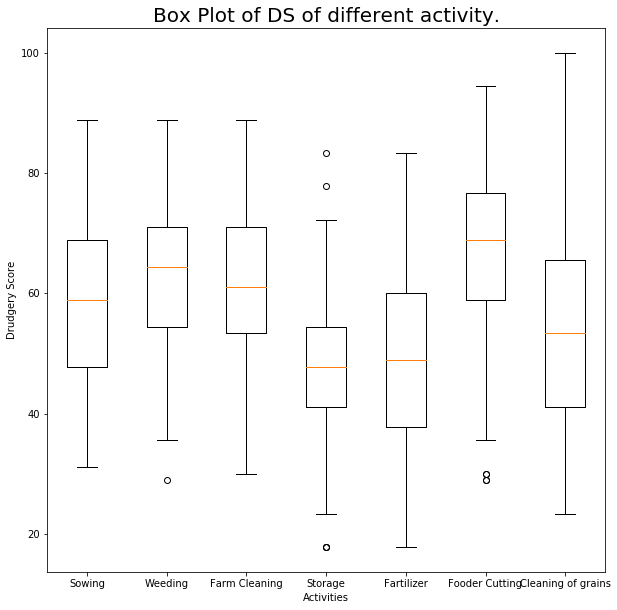

In [26]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of DS of different activity.", fontsize= 20)
ax.set


ax.boxplot([mean1,mean2,mean3,mean4,mean5,mean6,mean7],
           labels= ['Sowing','Weeding','Farm Cleaning','Storage','Fartilizer','Fooder Cutting','Cleaning of grains'],
           showmeans= False)

plt.xlabel("Activities")
plt.ylabel("Drudgery Score")

plt.show()

- **Ho : variance of DS for SHG and non-SHG group are same.**
- **H1 : Variance of DS for SHG and Non-SHG group are different.**

In [27]:

mean1=0
mean2=0
data1=[]
data2=[]
df1=125
df2=125
df=df1+df2-2
for i in range(125):
    if data["Q37"].iloc[i]=="SHG":
        mean1=mean1+data["DS"].iloc[i]
        data1.append(data["DS"].iloc[i])
    else:
        mean2=mean2+data["DS"].iloc[i]
        data2.append(data["DS"].iloc[i])
        

In [28]:
import scipy.stats as stats

print(stats.levene(data1, data2, center='mean'))

LeveneResult(statistic=2.8980182942915893, pvalue=0.0912145285587873)
LeveneResult(statistic=2.891221011457505, pvalue=0.09159057348851529)


> p value > alpha, we do not rejet Ho, and conclude that variance of DS for SHG-non SHG group are same.

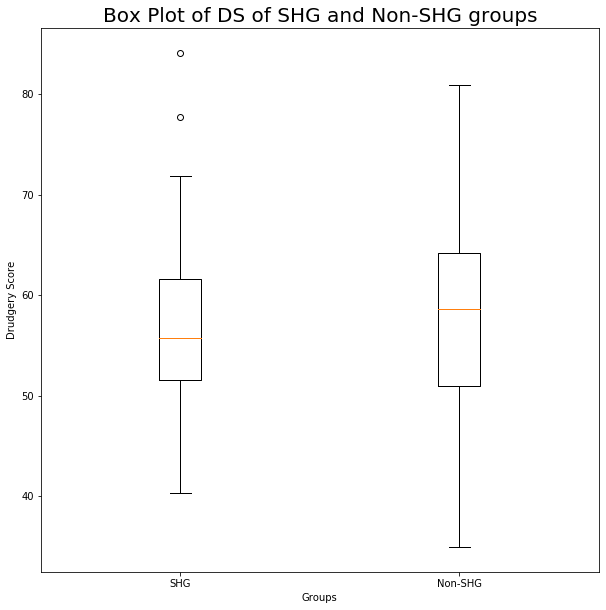

In [29]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)
ax.set_title("Box Plot of DS of SHG and Non-SHG groups", fontsize= 20)
ax.set


ax.boxplot([data1,data2],
           labels= ['SHG', 'Non-SHG'],
           showmeans= False)

plt.xlabel("Groups")
plt.ylabel("Drudgery Score")

plt.show()

In [47]:
A1 = data.query('SES1 == "Lower middle class"')['DS']

In [48]:
len(A1)

32